In [13]:
# Task 3: Cuisine Classification
# Cognifyz Technologies - Machine Learning Intern

# Step 1: Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Step 2: Load dataset
df = pd.read_csv("Dataset .csv")
df_cuisine = df[['Cuisines', 'Restaurant Name', 'Average Cost for two', 'Aggregate rating', 'Votes']].copy()
df_cuisine.dropna(subset=['Cuisines'], inplace=True)
df_cuisine.head()

,Cuisines,Restaurant Name,Average Cost for two,Aggregate rating,Votes
0,"French, Japanese, Desserts",Le Petit Souffle,1100.0,4.8,314.0
1,Japanese,Izakaya Kikufuji,1200.0,4.5,591.0
2,"Seafood, Asian, Filipino, Indian",Heat - Edsa Shangri-La,4000.0,4.4,270.0
3,"Japanese, Sushi",Ooma,1500.0,4.9,365.0
4,"Japanese, Korean",Sambo Kojin,1500.0,4.8,229.0


In [4]:
# Step 3: Keep only primary cuisine (in case of multiple)
df_cuisine['Cuisine'] = df_cuisine['Cuisines'].apply(lambda x: x.split(',')[0].strip())

In [9]:
# Step 4: Prepare features and target
X = df_cuisine[['Restaurant Name', 'Average Cost for two', 'Aggregate rating', 'Votes']].copy()
X['features'] = X['Restaurant Name']
X = X.drop('Restaurant Name', axis=1)


# Convert text to TF-IDF and concatenate with numerical
tfidf = TfidfVectorizer(max_features=100)
tfidf_features = tfidf.fit_transform(X['features']).toarray()

# Combine with numerical features
X_num = X.drop('features', axis=1).fillna(0)
X_final = np.hstack([X_num.values, tfidf_features])

# Encode labels
le = LabelEncoder()
y = le.fit_transform(df_cuisine['Cuisine'])

In [6]:
# Step 5: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

In [7]:
# Step 6: Train classification model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Classification Report:

                precision    recall  f1-score   support

       Afghani       0.00      0.00      0.00         1
      American       0.32      0.41      0.36        44
       Arabian       0.00      0.00      0.00         2
         Asian       0.50      0.25      0.33         8
           BBQ       0.20      1.00      0.33         1
        Bakery       0.51      0.52      0.52        46
      Bar Food       0.00      0.00      0.00         3
       Bengali       0.00      0.00      0.00         4
     Beverages       0.00      0.00      0.00         6
        Bihari       0.00      0.00      0.00         0
       Biryani       0.50      0.38      0.43         8
     Brazilian       0.57      0.67      0.62         6
     Breakfast       0.00      0.00      0.00         5
       British       0.00      0.00      0.00         0
        Burger       0.67      0.44      0.53        18
       Burmese       0.00      0.00      0.00         3
          Cafe       0.

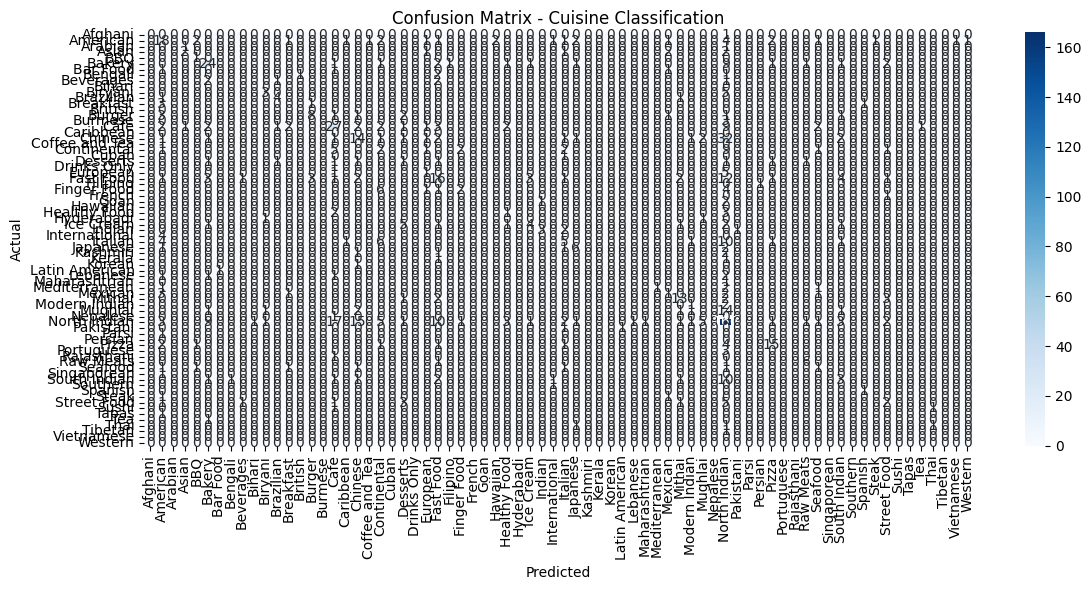

In [11]:
# Step 7: Evaluate model


# Get only the labels present in y_test/y_pred
labels_used = np.unique(np.concatenate((y_test, y_pred)))
class_names_used = le.inverse_transform(labels_used)

# Print classification report
print("Classification Report:\n")
print(classification_report(
    y_test, y_pred,
    labels=labels_used,
    target_names=class_names_used,
    zero_division=0
))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels_used)
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=class_names_used,
            yticklabels=class_names_used,
            cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Cuisine Classification")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()